In [ ]:
import tensorflow as tf
print(tf.__version__)

# Data

In [2]:
mnist = tf.keras.datasets.mnist

In [11]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

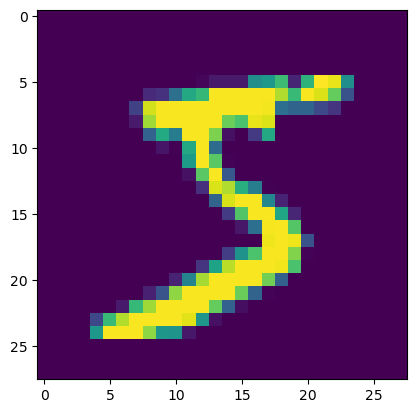

In [19]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [25]:
# from 0-255 to 0-1 (normalize)
training_images  = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [37]:
class Call_back(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        accuracy = logs.get('accuracy')
        if accuracy is not None and accuracy > 0.95:
            print("\nForce stopped training at 95% accuracy")
            self.model.stop_training = True

# CV model using simple DNN

In [34]:
cv = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [38]:
cv.compile(optimizer = tf.keras.optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

callback = Call_back()
cv.fit(training_images, training_labels, epochs=10, callbacks=[callback])

Epoch 1/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5077 - acc: 0.8691
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3925 - acc: 0.8929
Epoch 3/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3472 - acc: 0.9026
Epoch 4/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.3223 - acc: 0.9080
Epoch 5/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.3047 - acc: 0.9122
Epoch 6/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2912 - acc: 0.9161
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2799 - acc: 0.9193
Epoch 8/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2700 - acc: 0.9222
Epoch 9/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2611 - acc: 0.9241
Epoch 10/10
60000/60000 [==============================] - 13s 223us/sam

In [39]:
cv.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 123us/sample - loss: 0.2464 - acc: 0.9301


[0.2463598619401455, 0.9301]

Prediction

In [40]:
classifications = cv.predict(test_images)
print(classifications[0])

[4.54665897e-05 1.01518625e-08 7.90437989e-05 1.50294963e-03
 4.90058824e-07 3.94058115e-05 1.14623633e-09 9.97910321e-01
 2.21152422e-05 4.00166144e-04]


In [41]:
print(test_labels[0])
print(classifications[0][7])

7
0.9979103


Created a simple Deep Neural Network (DNN) for computer vision of fashion items. This was limited because it required the clothing item to be the only thing in the picture, and it had to be centered.

Of course, this isn't a realistic scenario. We want our DNN to be able to identify the clothing item in pictures with other objects, or where it isn't positioned front and center. To do this, we need to use convolutions.

In [47]:
#import cv2
import numpy as np
from scipy import misc
image = misc.ascent()

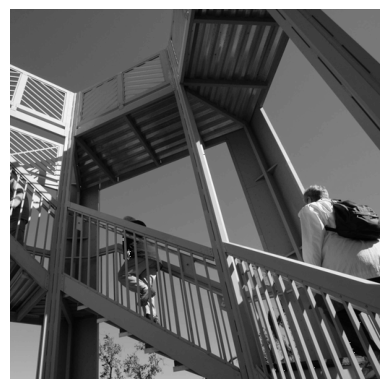

In [48]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image)
plt.show()

In [49]:
i_trans = np.copy(image)
size_x = i_trans.shape[0]
size_y = i_trans.shape[1]

Building a convolution matrix

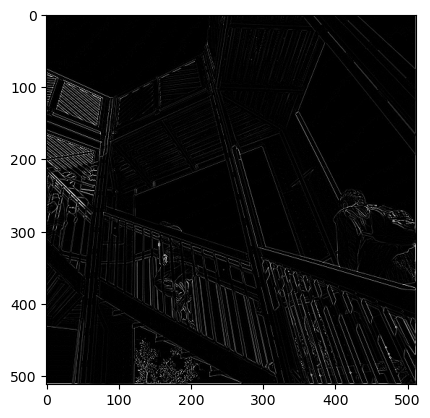

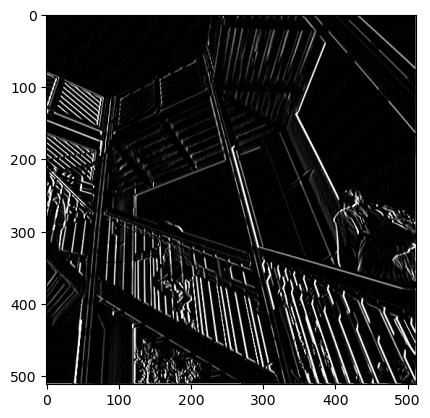

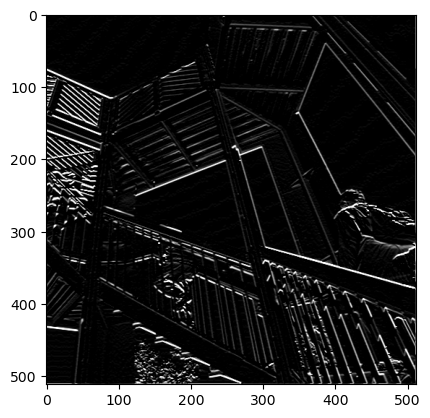

In [53]:
filter = [[[0, 1, 0], [1, -4, 1], [0, 1, 0]],
          [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]],
          [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] ]
weight = 1

for _ in range(len(filter)):
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        output_pixel = 0.0
        output_pixel = output_pixel + (image[x - 1, y-1] * filter[_][0][0])
        output_pixel = output_pixel + (image[x, y-1] * filter[_][0][1])
        output_pixel = output_pixel + (image[x + 1, y-1] * filter[_][0][2])
        output_pixel = output_pixel + (image[x-1, y] * filter[_][1][0])
        output_pixel = output_pixel + (image[x, y] * filter[_][1][1])
        output_pixel = output_pixel + (image[x+1, y] * filter[_][1][2])
        output_pixel = output_pixel + (image[x-1, y+1] * filter[_][2][0])
        output_pixel = output_pixel + (image[x, y+1] * filter[_][2][1])
        output_pixel = output_pixel + (image[x+1, y+1] * filter[_][2][2])
        output_pixel = output_pixel * weight
        if(output_pixel<0):
          output_pixel=0
        if(output_pixel>255):
          output_pixel=255
        i_trans[x, y] = output_pixel

  plt.gray()
  plt.grid(False)
  plt.imshow(i_trans)
  #plt.axis('off')
  plt.show()

pooling

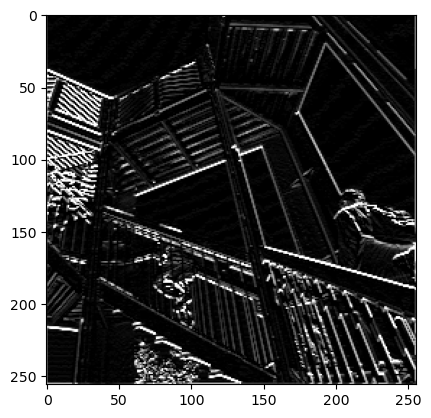

In [54]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_trans[x, y])
    pixels.append(i_trans[x+1, y])
    pixels.append(i_trans[x, y+1])
    pixels.append(i_trans[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()